In [1]:
using Pkg; Pkg.activate("../")
using PlotMissing
using Arrow
using DataFrames
import PlotMissing: _bitmatrix, _luminance, _isnan, _maxcols, _maxbins
using CairoMakie
using Statistics
using ColorSchemes

ENV["COLUMNS"] = 1000

  Activating project at `~/Desktop/docker-root/PlotMissing.jl`
┌ Info: Precompiling PlotMissing [8c90d6d1-7f64-497a-98c1-8c1bee67a127]
└ @ Base loading.jl:1504


1000

In [60]:
df = Arrow.Table("../test/data/nycsample.arrow") |> DataFrame

100000×22 DataFrame
    Row │ DOLocationID  PULocationID  RatecodeID  VendorID  congestion_surcharge  dropoff_latitude  dropoff_longitude  extra      fare_amount  improvement_surcharge  mta_tax    passenger_count  payment_type  pickup_latitude  pickup_longitude  store_and_fwd_flag  tip_amount  tolls_amount  total_amount  tpep_dropoff_datetime  tpep_pickup_datetime  trip_distance 
        │ Int64?        Int64?        Int64?      String?   Float64?              Float64?          Float64?           Float64?   Float64      Float64                Float64?   Int64?           String?       Float64?         Float64?          String?             Float64     Float64       Float64       Dates.DateTime         Dates.DateTime        Float64       
────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      1 │      missing       missing           1  VTS                  missing             40.7812           -73.9594  missing            9.0                    0.0        0.5                2  CSH                   40.7692          -73.9653  missing                   0.0           0.0           9.5   2014-01-28T15:32:00    2014-01-28T15:19:00            1.03
      2 │      missing       missing           1  VTS                  missing             40.7319           -74.0088  missing           33.3                    0.0        0.5                1  CRD                   40.7737          -73.8708  missing                   6.66          4.8          45.26  2012-04-27T13:42:00    2012-04-27T13:06:00           13.53
      3 │      missing       missing           1  2                    missing             40.7463           -74.0009        0.5          7.5                    0.3        0.5                3  1                     40.7328          -73.9858  N                         1.76          0.0          10.56  2016-05-15T01:55:58    2016-05-15T01:49:10            1.57
      4 │      missing       missing           1  VTS                  missing             40.7556           -73.9635  missing            8.9                    0.0        0.5                1  CAS                   40.7706          -73.9571  missing                   0.0           0.0           9.4   2010-01-25T10:12:00    2010-01-25T09:57:00            1.23
      5 │      missing       missing           1  CMT                  missing             40.7323           -74.0066  missing            4.9                    0.0        0.5                2  CSH                   40.7171          -74.0091  N                         0.0           0.0           5.4   2012-06-30T20:00:16    2012-06-30T19:56:44            1.1
      6 │      missing       missing           1  VTS                  missing             40.7801           -73.958   missing            3.7                    0.0        0.5                2  CAS                   40.7801          -73.958   missing                   0.0           0.0           4.2   2010-01-09T09:52:00    2010-01-09T09:50:00            0.69
      7 │            4           125           1  2                    missing        missing            missing             0.5          8.0                    0.3        0.5                2  1                missing           missing       N                         1.86          0.0          11.16  2017-02-08T20:02:03    2017-02-08T19:53:36            1.51
      8 │      missing       missing           1  VTS                  missing             40.7432           -74.0074  missing            6.5                    0.5        0.5                1  CRD                   40.7351          -73.9942  missing                   1.4           0.0           8.9   2014-05-11T20:45:00    2014-05-11T20:38:00            1

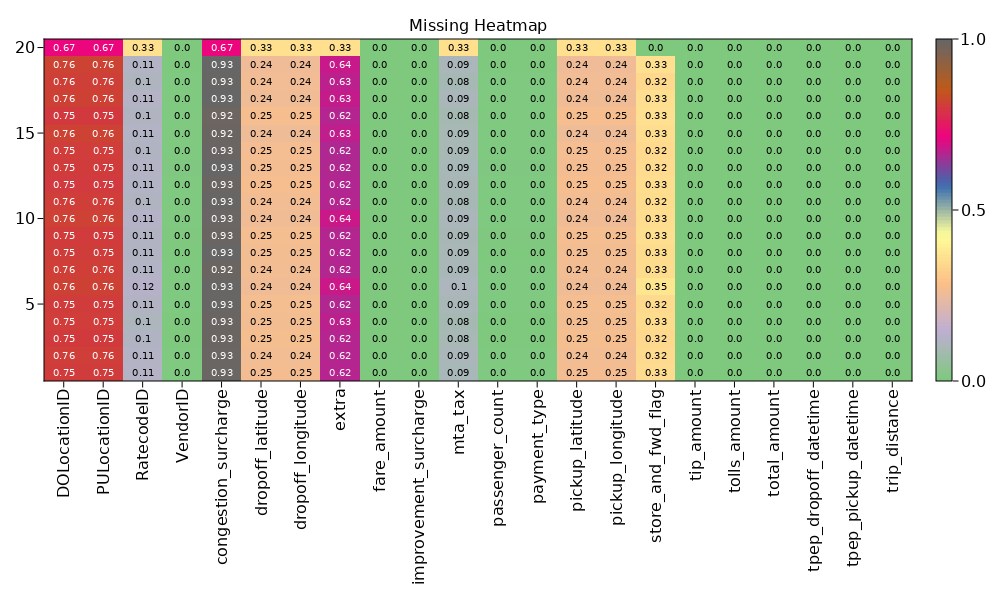

In [38]:
missing_heatmap(df; colormap=:Accent_8, resolution=(1000,600), annotation=true, missing_values=[:missing], colorbar=true)

In [39]:
missing_heatmap(df; colormap=:tab10, resolution=(1000,600), annotation=true, missing_values=[:missing], colorbar=true)

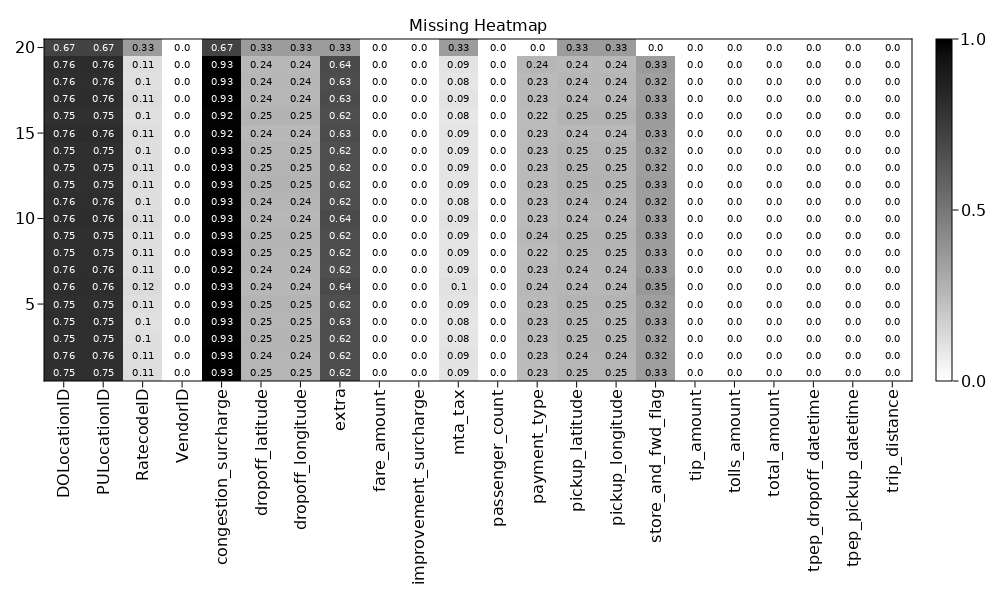

In [62]:
missing_heatmap(df; colormap=:grayC, resolution=(1000,600), annotation=true, missing_values=[:missing, "CRD", :nan], colorbar=true)

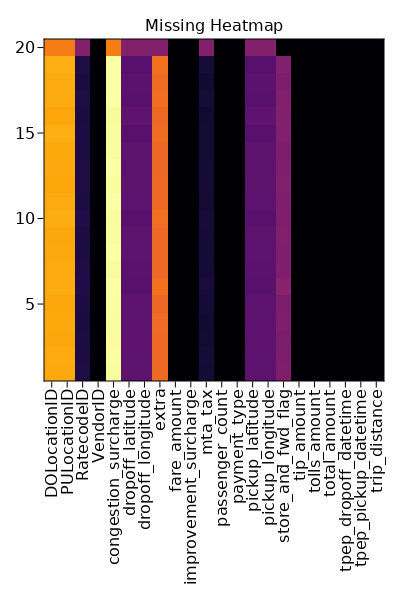

In [49]:
missing_heatmap(df; colormap=:inferno, resolution=(400,600), annotation=true, missing_values=[:missing], colorbar=false)

In [50]:
df = DataFrame(
                t1=[1, 2, 3, 4, NaN], 
                t2=["A", "B", NaN, missing, 23] 
                )

5×2 DataFrame
 Row │ t1       t2      
     │ Float64  Any     
─────┼──────────────────
   1 │     1.0  A
   2 │     2.0  B
   3 │     3.0  NaN
   4 │     4.0  missing 
   5 │   NaN    23

In [55]:
df |> PlotMissing._bitmatrix

5×2 Matrix{Bool}:
 0  0
 0  0
 0  0
 0  1
 0  0

In [54]:
[0 0; 0 0; 0 1; 0 1; 1 0]

5×2 Matrix{Int64}:
 0  0
 0  0
 0  0
 0  1
 0  0

In [58]:
_bitmatrix(df, [:missing, "A"])

5×2 Matrix{Bool}:
 0  1
 0  0
 0  0
 0  1
 0  0